# 인천광역시의 연령 및 직업별 소비 데이터 분석

===================================================================================================================

본 과제에서는 인천광역시에서의 사업을 진행한다는 가정하에 소비자 타겟을 정하기 위한 정보 분석을 위해 가장 최근 자료인 2020년도 6월 데이터를 기반으로 분석을 진행한다.

음식점, 옷가게 등 점포 사업을 시작하기 위해서는 해당 지역의 인구 분포 조사 역시 중요하지만 가장 중요한 것은 선택한 사업 아이템의 주요 고객층의 수요를 분석하는 것이 중요하다.

연령대 별 소비 금액의 수준을 알고 직업별 소비 수준을 확인 가능하면 이 데이터를 기반으로 고객층을 타겟으로 하여 마케팅 및 상품 개발 및 소싱에도 참고할 자료로 사용이 가능하다.

우선 데이터 분석은 하단과 같이 진행을 한다.

- 연령대 별 소비 수준 분석

- 직업 별 소비 수준 분석

-

-

===================================================================================================================

## 작업 환경


- Python Version : Python 3.10.13

- Edit date : 2024/04/17

## 데이터 출처

- 공공데이터 포탈 : https://www.data.go.kr/data/15076578/fileData.do

In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

공공데이터 포탈의 csv 데이터는 CP949의 형태로 입력되어 있어 pandas로 encoding을 CP949로 변경하여 데이터를 읽어들인다.

- 데이터의 상세 정보 설명

    ※ 인구단위: 명/ 금액단위: 천원

- 성별 

    -> 0 : 전체 , 1 : 남성 , 2 : 여성

- 직업구분 

    ->  0 : 전체, 1 : 자영업자, 2 : 급여소득자(상장), 3 : 급여소득자(비상장), 4 : 비경제활동인구

- 최근 12개월신용 및 체크카드이용 금액합계

    -> [최근12개월 전체 신용카드  및 체크카드의 신용판매 이용금액 합계(현금서비스 제외)// 단위: 천원]

- 최근 12개월 전체체크카드 이용금액합계
    
    -> [최근12개월 전체 체크카드 이용금액  합계// 단위: 천원]

- 최근 12개월 해외이용금액합계
    
    -> [최근12개월 전체 신용카드 해외  신용판매 이용금액 합계(현금서비스 제외)// 단위: 천원]

- 최근 12개월 평균신용  및 체크카드이용 금액합계

    -> [최근12개월 (신용카드+체크카드)  이용금액 >0 인 인구의 (신용카드+체크카드) 신용판매 이용금액 평균(현금서비스 제외)// 단위: 천원]

In [14]:
# 인천광역시의 6월 소비 데이터 CP949로 인코딩 후 출력

df = pd.read_csv("/workspaces/ml202401-midterm-LeeEulHo/incheon_2006.csv", encoding="CP949")
df.head()

,기준년월,행정동코드,시도명,시군구명,성별,연령별,직업구분,분위구분,최근12개월신용및체크카드이용금액합계,최근12개월전체체크카드이용금액합계,...,최근12개월해외이용인구수,최근1개월신용및체크카드이용금액합계,최근1개월체크카드이용금액합계,최근1개월해외신판이용금액합계,최근1개월평균신용및체크카드이용금액,최근1개월평균체크카드이용금액,최근1개월평균해외이용금액,최근1개월신용및체크카드이용인구수,최근1개월체크카드이용인구수,최근1개월해외이용인구수
0,2020-06-30,2820000000,인천광역시,남동구,0,70,4,10,4390122.0,667287.0,...,19,298604.0,24817.0,NaN,2133.0,564.0,NaN,140,44,2
1,2020-06-30,2814000000,인천광역시,동구,0,30,4,0,53588597.0,17895533.0,...,790,4572487.0,1532379.0,23489.0,1325.0,555.0,117.0,3450,2762,201
2,2020-06-30,2814000000,인천광역시,동구,1,70,4,3,1077528.0,210527.0,...,4,99124.0,25705.0,NaN,597.0,357.0,NaN,166,72,1
3,2020-06-30,2820000000,인천광역시,남동구,1,0,3,3,60992204.0,15770823.0,...,916,5883221.0,1461265.0,35405.0,1688.0,562.0,134.0,3486,2600,264
4,2020-06-30,2814000000,인천광역시,동구,1,70,3,6,222765.0,23867.0,...,0,16328.0,549.0,NaN,960.0,183.0,NaN,17,3,0


In [15]:
# 데이터의 총량 및 정보 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14733 entries, 0 to 14732
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   기준년월                   14733 non-null  object 
 1   행정동코드                  14733 non-null  int64  
 2   시도명                    14733 non-null  object 
 3   시군구명                   14733 non-null  object 
 4   성별                     14733 non-null  int64  
 5   연령별                    14733 non-null  int64  
 6   직업구분                   14733 non-null  int64  
 7   분위구분                   14733 non-null  int64  
 8   최근12개월신용및체크카드이용금액합계    12547 non-null  float64
 9   최근12개월전체체크카드이용금액합계     12537 non-null  float64
 10  최근12개월해외이용금액합계         10932 non-null  float64
 11  최근12개월평균신용및체크카드이용금액합계  12547 non-null  float64
 12  최근12개월평균체크카드이용금액       12537 non-null  float64
 13  최근12개월평균해외이용금액         10932 non-null  float64
 14  최근12개월신용및체크카드이용인구수     14733 non-null  int64  
 15  최근

In [16]:
# 전처리에 앞서 결측치 여부 확인

df.isnull().sum()

기준년월                        0
행정동코드                       0
시도명                         0
시군구명                        0
성별                          0
연령별                         0
직업구분                        0
분위구분                        0
최근12개월신용및체크카드이용금액합계      2186
최근12개월전체체크카드이용금액합계       2196
최근12개월해외이용금액합계           3801
최근12개월평균신용및체크카드이용금액합계    2186
최근12개월평균체크카드이용금액         2196
최근12개월평균해외이용금액           3801
최근12개월신용및체크카드이용인구수          0
최근12개월체크카드이용인구수             0
최근12개월해외이용인구수               0
최근1개월신용및체크카드이용금액합계       2219
최근1개월체크카드이용금액합계          2292
최근1개월해외신판이용금액합계          6091
최근1개월평균신용및체크카드이용금액       2219
최근1개월평균체크카드이용금액          2292
최근1개월평균해외이용금액            6091
최근1개월신용및체크카드이용인구수           0
최근1개월체크카드이용인구수              0
최근1개월해외이용인구수                0
dtype: int64

In [17]:
# 데이터의 요약 확인

df.describe()

,행정동코드,성별,연령별,직업구분,분위구분,최근12개월신용및체크카드이용금액합계,최근12개월전체체크카드이용금액합계,최근12개월해외이용금액합계,최근12개월평균신용및체크카드이용금액합계,최근12개월평균체크카드이용금액,...,최근12개월해외이용인구수,최근1개월신용및체크카드이용금액합계,최근1개월체크카드이용금액합계,최근1개월해외신판이용금액합계,최근1개월평균신용및체크카드이용금액,최근1개월평균체크카드이용금액,최근1개월평균해외이용금액,최근1개월신용및체크카드이용인구수,최근1개월체크카드이용인구수,최근1개월해외이용인구수
count,1.473300e+04,14733.000000,14733.000000,14733.000000,14733.000000,1.254700e+04,1.253700e+04,1.093200e+04,12547.000000,12537.000000,...,14733.000000,1.251400e+04,1.244100e+04,8.642000e+03,12514.000000,12441.000000,8642.000000,1.473300e+04,1.473300e+04,14733.000000
mean,2.825885e+09,0.985068,40.271160,2.007738,4.945564,9.290324e+07,2.164106e+07,1.314933e+06,19159.554156,5464.498684,...,898.061223,8.050596e+06,1.956844e+06,6.206362e+04,1692.238773,612.180934,180.821106,4.420668e+03,3.009242e+03,203.824340
std,2.116392e+07,0.816471,25.026922,1.480599,3.190958,5.721713e+08,1.363356e+08,7.904683e+06,15373.285167,5445.130177,...,6087.636104,4.950159e+07,1.226565e+07,3.325635e+05,1374.892045,550.529215,241.006078,2.994250e+04,2.078023e+04,1406.140513
min,2.800000e+09,0.000000,0.000000,0.000000,0.000000,5.296000e+03,7.170000e+02,7.100000e+01,1000.000000,156.000000,...,0.000000,2.740000e+02,7.500000e+01,5.000000e+00,91.000000,23.000000,2.000000,0.000000e+00,0.000000e+00,0.000000
25%,2.814000e+09,0.000000,20.000000,1.000000,2.000000,1.252306e+06,2.852450e+05,1.488050e+04,10621.500000,3468.000000,...,2.000000,1.080290e+05,2.599200e+04,1.310750e+03,1005.000000,436.000000,84.000000,2.600000e+01,1.500000e+01,0.000000
50%,2.820000e+09,1.000000,40.000000,2.000000,5.000000,7.313203e+06,1.591088e+06,9.176800e+04,17397.000000,4861.000000,...,33.000000,6.391875e+05,1.485890e+05,6.333000e+03,1542.500000,552.000000,128.000000,2.340000e+02,1.400000e+02,6.000000
75%,2.826000e+09,2.000000,60.000000,3.000000,8.000000,3.822899e+07,9.124314e+06,5.056510e+05,24163.500000,6348.000000,...,310.000000,3.381234e+06,8.441920e+05,2.858100e+04,2108.000000,682.000000,198.000000,1.642000e+03,1.054000e+03,65.000000
max,2.872000e+09,2.000000,90.000000,4.000000,10.000000,3.643071e+10,8.479848e+09,4.492809e+08,922061.000000,320416.000000,...,413473.000000,3.148620e+09,7.608825e+08,1.677462e+07,90182.000000,27364.000000,4968.000000,2.035303e+06,1.385474e+06,93842.000000


Text(0.5, 1.0, 'Top Consumption Of Age')

/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/s

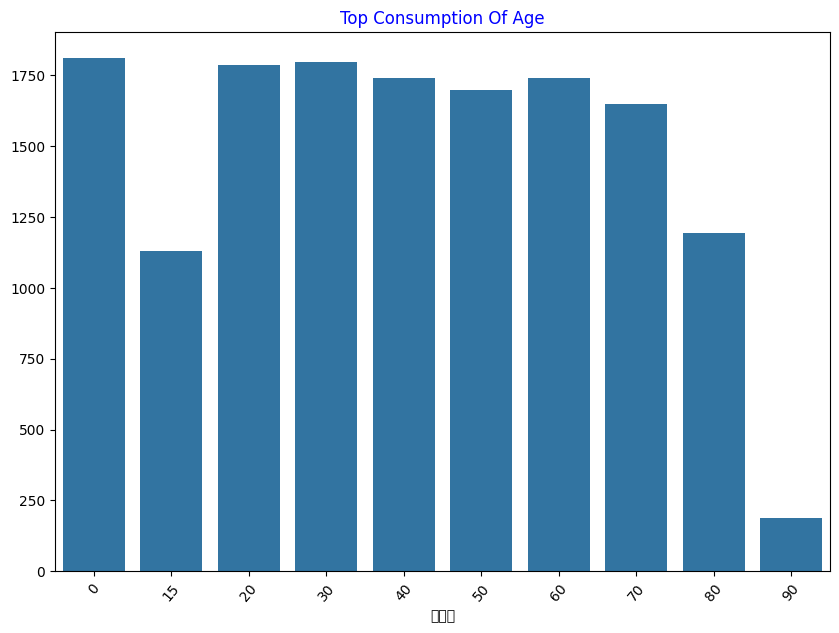

In [23]:
# 시각화를 진행하여 소비가 가장 많은 연령을 확인

import seaborn as sns

top = df['연령별'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:20].index,y=top[:20].values)
plt.xticks(rotation=50)
plt.title('Top Consumption Of Age',color = 'blue')